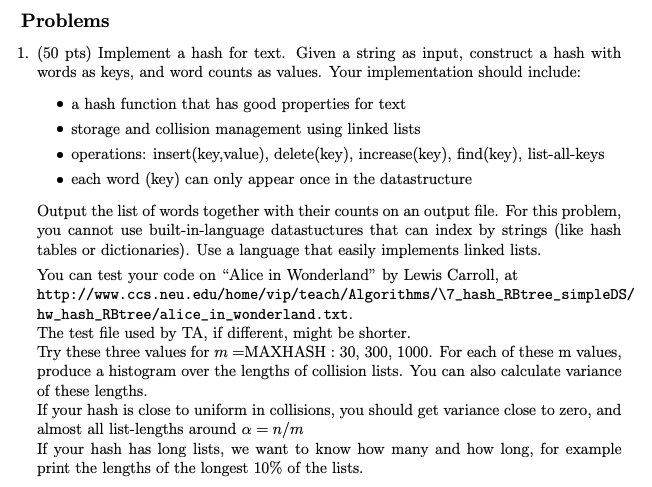

In [139]:
# Resource used: 
# https://betterprogramming.pub/how-to-create-a-linked-list-in-python-aaf2796e0dd6
#import pdb

max_hash = 300

class LinkedList:
    #Should I make the head the index position?
    def __init__(self):
        self.head = None

    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next
    
    def insert_first(self, node):
        node.next = self.head
        self.head = node

    def delete_node(self, ll_index, key):

        key_location = self.hash_mod_crc(key)
        
        key_found = ll_index[key_location]

        current = key_found
        while current:
            if current.next.key == key:
                #return current.key
                current = current.next.next

            current = current.next

        # key_location = self.hash_mod_crc(key)

        # # Store head node
        # temp = self.head
 
        # # If head node itself holds the key to be deleted
        # if (temp is not None):
        #     if (temp.key == key):
        #         self.head = temp.next
        #         temp = None
        #         return
 
        # # Search for the key to be deleted, keep track of the
        # # previous node as we need to change 'prev.next'
        # while(temp is not None):
        #     if temp.key == key:
        #         break
        #     prev = temp
        #     temp = temp.next
 
        # # if key was not present in linked list
        # if(temp == None):
        #     return
 
        # # Unlink the node from linked list
        # prev.next = temp.next
 
        # temp = None

    # def update_node(self, node, value):
    #     pdb.set_trace()
    #     node.value = value
    #     print('node updated')

    def insert_after(self, target_data, new_node):
        if self.head is None:
            raise Exception("Empty list")

        for node in self:
            if node.data == target_data:
                new_node.next = node.next
                node.next = new_node
                return

        raise Exception("Target node not found")

    def visualize(self):
        node = self.head
        nodes = []
        values = []
        while node is not None:
            nodes.append(node.key)
            values.append(node.value)
            node = node.next
        #nodes.append("None")
        #print(nodes)
        return nodes, values
        #print((nodes))

    def find_index(self, key, ll_index):
        #https://www.sanfoundry.com/python-program-search-element-linked-list-without-using-recursion/

        #Find function should find the index then print out the key here, like with Alice
        #list length is 10, mod is 10, 

        key_location = self.hash_mod_crc(key)
        key_found = ll_index[key_location]
        import pdb
        pdb.set_trace()
        
        current = key_found
        while current:
            if current.key == key:
                return current.key
            current = current.next

        return -1

    def increase_node(self, key):
        #For inserting a new word, calculate the hash value, then show that word being inserted.

        #https://www.sanfoundry.com/python-program-search-element-linked-list-without-using-recursion/
        current = self.head
        # import pdb
        # pdb.set_trace()
        while current:
            if current.key == key:
                #print('node found, adding to value')
                current.value = current.value + 1
                return current.key
            current = current.next
        return -1

    def hash_mod_crc(self, text):
      return crc32(text.encode('utf-8')) % max_hash

    def creating_hash_table(self, corpus, m):
      linked_list_index = []
      for i in range(0,m):
        l_list = LinkedList()
        linked_list_index.append(l_list)

      for word in corpus:
        index_location = hash_mod_crc(word, m)
        key_found = linked_list_index[index_location].increase_node(word)
        if key_found == -1:
            #print(index_location)
            #print('"',str(word) + '" was not found and is now added!')
            linked_list_index[index_location].insert_first(Node(word,1))
            #l_list.increase_node()
      
      print('all ', len(corpus), ' words placed in a hash table of ', m,' slots.')
      return linked_list_index 
          

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

In [140]:
def hash_mod_crc(text):
  return crc32(text.encode('utf-8')) % max_hash

In [141]:
import urllib.request

url = "https://www.ccs.neu.edu/home/vip/teach/Algorithms/7_hash_RBtree_simpleDS/hw_hash_RBtree/alice_in_wonderland.txt"
file = urllib.request.urlopen(url)

text_list = []
for line in file:
  decoded_line = line.decode('utf-8', 'ignore')
  decoded_line = decoded_line.replace('\r\n','')
  text_list.append(decoded_line)
	#print(decoded_line)

In [142]:
print(len(text_list))
text_list[100]

1703


'The rabbit-hole went straight on like a tunnel for some way and then'

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


corpus = []
for text_lines in text_list:

  text = text_lines
  text_tokens = word_tokenize(text)

  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  #corpus = text_lines + corpus
  #res = [''.join(ele) for ele in text_lines]
  corpus = tokens_without_sw + corpus
  
  #split_words = text_lines.split(" ")
  #corpus = split_words + corpus
  #corpus.append(split_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reading in an individual line and then splitting that line to make a list of words. Then I am encoding the words into bytes.

In [ ]:
corpus[100].encode('utf-8')

b'electronic'

In [ ]:
from zlib import crc32
#crc32(key.encode('utf-8'))

test_hash_crc = crc32(corpus[100].encode('utf-8'))

In [ ]:
test_hash_crc

510603358

Creating the hash table, need to create the linked lists in a list first before inserting word keys and values.

In [ ]:
def creating_hash_table(corpus):
  linked_list_index = []
  for i in range(0,max_hash):
    l_list = LinkedList()
    linked_list_index.append(l_list)

  for word in corpus:
    index_location = hash_mod_crc(word)
    key_found = linked_list_index[index_location].increase_node(word)
    if key_found == -1:
        #print(index_location)
        #print('"',str(word) + '" was not found and is now added!')
        linked_list_index[index_location].insert_first(Node(word,1))
        #l_list.increase_node()
  
  print('all ', len(corpus), ' words placed in a hash table of ', max_hash,' slots.')
  return linked_list_index 


In [ ]:
def find_index(key, ll_index):
    #https://www.sanfoundry.com/python-program-search-element-linked-list-without-using-recursion/

    #Find function should find the index then print out the key here, like with Alice
    #list length is 10, mod is 10, 
    key_location = hash_mod_crc(key)
    key_found = ll_index[key_location]
    
    current = key_found.head
    while current:
        if current.key == key:
            return current.key
        current = current.next

    return -1

In [ ]:
def delete_node(key, ll_index):

        key_location = hash_mod_crc(key)
        
        key_found = ll_index[key_location]
        current = key_found.head
        while current:
            if current.next and current.next.key == key:

                # return current.key

              current.next = current.next.next
            # import pdb
            # pdb.set_trace()
            current = current.next
        return print('deleted ', key)

In [ ]:
def insert_first(key, ll_index):
  
    key_location = hash_mod_crc(key)
    
    key_found = ll_index[key_location]

    node = Node(key, 1)

    node.next = key_found.head
    key_found.head = node


In [ ]:

def increase_node(key, ll_index):
    key_location = hash_mod_crc(key)
  
    key_found = ll_index[key_location]
    #For inserting a new word, calculate the hash value, then show that word being inserted.

    #https://www.sanfoundry.com/python-program-search-element-linked-list-without-using-recursion/
    current = key_found.head
    # import pdb
    # pdb.set_trace()
    while current:
        if current.key == key:
            #print('node found, adding to value')
            current.value = current.value + 1
            print(current.value)
            return current.key
        current = current.next
    return -1

In [ ]:
len(corpus)

8631

In [ ]:
hash_table_ll_index = creating_hash_table(corpus)

all  8631  words placed in a hash table of  300  slots.


In [ ]:
#hash_table_ll_index[6878].delete_node(',')

In [ ]:
#hash_table_ll_index[6878].visualize()

In [ ]:
key_found = find_index(key = 'Alice', ll_index = hash_table_ll_index)
print(key_found)

Alice


In [ ]:
delete_node(key = 'Alice', ll_index = hash_table_ll_index)

deleted  Alice


In [ ]:
insert_first('Alice', ll_index = hash_table_ll_index)

In [ ]:
increase_node('Alice', ll_index = hash_table_ll_index)

3


'Alice'

In [ ]:
Find("Alice")
Delete("Alice")
Find("Alice")
Insert("Alice")
Find("Alice")
Increase("Alice)
ListAllKeys()

In [ ]:
import pandas as pd
import numpy as np
ll_output = []
position = 0
dfs = []

for ll in hash_table_ll_index:
  try:
    node_keys, node_values = ll.visualize()
    index_position = (position*np.ones(len(node_keys))).tolist()
    node_info = list(zip(node_keys,node_values, index_position))
    df = pd.DataFrame(data = node_info, columns = ['node_keys', 'node_values', 'index'])
  except ValueError:
    df = pd.DataFrame(np.array([0, 0, position]), columns = ['node_keys', 'node_values', 'index'])
  position += 1
  dfs.append(df)

  #output = ll.visualize()
  #ll_output.append(output)

In [ ]:
word_info = pd.concat(dfs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff72ece9790>,
      dtype=object)

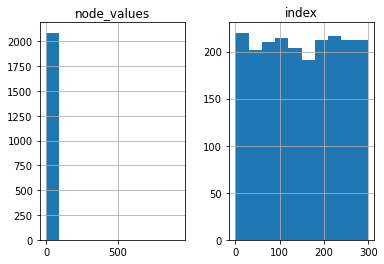

In [ ]:
word_info.hist(bins =10)

In [ ]:
top_10 = word_info.groupby('index').agg(sum)

In [ ]:
len(word_info)*.1

In [ ]:
import math
print(top_10.sort_values(by = 'node_values', ascending = False).head(math.ceil(len(word_info)*.1)))

       node_values
index             
278.0         1470
24.0           370
1.0            365
25.0           187
71.0           186
...            ...
165.0           11
39.0            11
250.0           11
93.0            11
72.0            11

[210 rows x 1 columns]


In [ ]:
from google.colab import files
word_info.to_csv('output_file.csv',index = False)
files.download('output_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from zlib import crc32

In [ ]:
#make the head the 972 index number, then add nodes which are keys
first_node = Node('a', 0)
second_node = Node('b', 0)
third_node = Node('c', 10)

l_list = LinkedList()

l_list.head = first_node
first_node.next = second_node
second_node.next = third_node

3471727949181912358

In [ ]:
#Use the search methodology to check if a word is in a linked list via search, if it is, increasing value by 1
# If the word is not in the linked list, then insert first (higher likelihood of finding), set value to 1.
#key = input('key to search:')
key = 'a'
key_found = l_list.increase_node(key)
if key_found == -1:
    print(str(key) + ' was not found.')
    l_list.insert_first(Node(key,1))
    #l_list.increase_node()

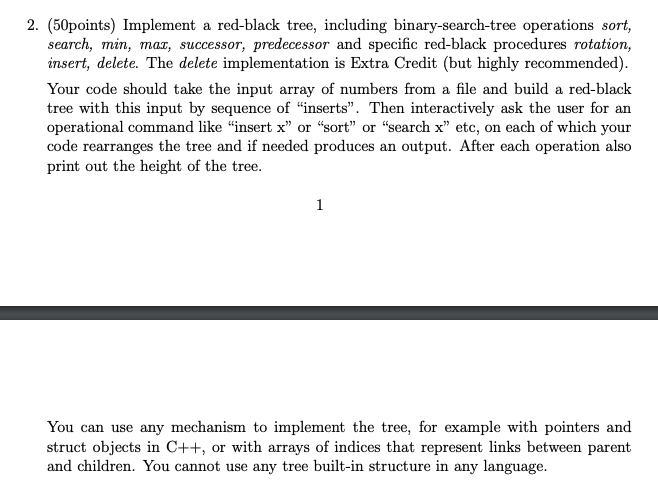

In [ ]:
class Node():
    def __init__(self, key):
        self.left = None
        self.right = None
        self.p = None
        self.key = key
        self.color = 0 #Red = 1, Black = 0

import pdb
class RBTree():
    def __init__(self):
        self.NULL = Node(0)
        self.NULL.color = 0 #Red = 1, Black = 0
        self.NULL.left = None
        self.NULL.right = None
        self.root = self.NULL

    def tree_minimum(self, x):
        while x.left != self.NULL:
          x = x.left
        return x

    def tree_maximum(self, x):
      while x.right != self.NULL:
        x = x.right
      return x

    def tree_successor(self, x):
      if x.right != self.NULL:
        return self.tree_minimum(x.right)
      y = x.p
      while (y != None and x == y.right):
        x = y
        y = y.p
      return y

    def tree_predecessor(self, x):
      if x.left != self.NULL:
        return self.tree_maximum(x.left)
      y = x.p
      while (y != None and x == y.left):
        x = y
        y = y.p
      return y
    
    def left_rotate(self, x):
      y = x.right
      x.right = y.left
      if y.left != self.NULL:
        y.left.p = x
      y.p = x.p
      if x.p is None:
        self.root = y
      elif x.p.left == x:
        x.p.left = y
      else:
        x.p.right = y
      y.left = x
      x.p = y

    def right_rotate(self, x):
      y = x.left
      x.left = y.right
      if y.right != self.NULL:
        y.right.p = x
      y.p = x.p
      if x.p is None:
        self.root = y
      elif x.p.right == x:
        x.p.right = y
      else:
        x.p.left = y
      y.right = x
      x.p = y

    def rb_insert_fixup(self, z):
      while z != self.root and z.p.color == 1:
        if z.p == z.p.p.left:
          y = z.p.p.right
          if y.color == 1:
            z.p.color = 0
            y.color = 0
            z.p.p.color = 1
            z = z.p.p
          else:
            if z == z.p.right:
              z = z.p
              self.left_rotate(z)
            z.p.color = 0
            z.p.p.color = 1
            self.right_rotate(z.p.p)
        else:
          y = z.p.p.left
          if y.color == 1:
            z.p.color = 0
            y.color = 0
            z.p.p.color = 1
            z = z.p.p
          else:
            if z == z.p.left:
              z = z.p
              self.right_rotate(z)
            z.p.color = 0
            z.p.p.color = 1
            self.left_rotate(z.p.p)
      self.root.color = 0

    def insert(self, z):

      node = Node(z)
      node.p = self.NULL
      node.key = z
      node.left = self.NULL
      node.right = self.NULL
      node.color = 1

      y = None
      x = self.root
      
      while x != self.NULL:
        y = x
        #pdb.set_trace()
        if node.key < x.key:
          x = x.left
        else:
          x = x.right
      
      node.p = y

      if y == None:
    
        self.root = node
      elif node.key < y.key:
        y.left = node
      else:
        y.right = node

      if node.p == None:
        node.color = 0
      
      elif node.p.p != None:
        self.rb_insert_fixup(node)


    # def insert(self, z):
    #   node = Node(z)
    #   node.parent = None
    #   node.key = z
    #   node.left = self.NULL
    #   node.right = self.NULL
    #   node.color = 1
    #   #pdb.set_trace()

    #   y = None
    #   x = self.root
    #   #import pdb
    #   #pdb.set_trace()

    #   while x != self.NULL:
    #     y = x
    #     #pdb.set_trace()
    #     if node.key < x.key:
    #       x = x.left
    #     else:
    #       x = x.right
      
    #   node.p = y
    #   if y == None:
    #     self.root = node
    #   elif node.key < y.key:
    #     y.left = node
    #   else:
    #     y.right = node

    #   if node.parent != None:
    #     node.color = 0
    #     return
      
    #   if node.parent.parent != None:
    #     return

       


      # Function to call print
    
    def inorder(self) :
      temp = self.root
      stack =  []
      while (temp != None or not (len(stack) == 0)) :
          if (temp != None) :
              stack.append(temp)
              temp = temp.left
          else :
              temp = stack.pop()
              print(temp.key, temp.color, " ", end ="")
              temp = temp.right
    
    def tree_search(self,x,k):
      while (x != None and k != x.key):
        if k < x.key:
          x = x.left
        else:
          x = x.right
      return x.key


    # class Node():
    # def __init__(self, key):
    #     self.left = None
    #     self.right = None
    #     self.p = None
    #     self.key = key
    #     self.color = 1 #Red = 1, Black = 0




In [ ]:
bst = RBTree()

bst.insert(10)
bst.insert(7)
bst.insert(20)
bst.insert(12)
bst.insert(18)
bst.insert(25)
bst.insert(30)
bst.insert(40)
bst.insert(16)
bst.insert(14)
bst.inorder()
#

0 0  7 0  0 0  10 1  0 0  12 1  0 0  14 0  0 0  16 1  0 0  18 0  0 0  20 0  0 0  25 1  0 0  30 0  0 0  40 1  0 0  

In [ ]:
bst.insert(4)
bst.insert(8)
bst.insert(1)
bst.insert(2)
bst.inorder()

0 0  1 1  0 0  2 0  0 0  4 1  0 0  7 1  0 0  8 0  0 0  10 0  0 0  12 1  0 0  14 0  0 0  16 1  0 0  18 0  0 0  20 0  0 0  25 0  0 0  30 0  0 0  40 1  0 0  

In [ ]:
print(bst.tree_minimum(bst.root).key)

1


In [ ]:
print(bst.tree_maximum(bst.root).key)

40


In [ ]:
bst.tree_search(bst.root, 12)

12

In [ ]:
bst.tree_search(bst.root, 32)

AttributeError: ignored

In [ ]:
bst.tree_successor(bst.root).key
#bst.tree_successor(16)

20

In [ ]:
bst.tree_predecessor(bst.root).key

16

In [ ]:
bst.inorder()

0 0  1 1  0 0  2 0  0 0  4 1  0 0  7 1  0 0  8 0  0 0  10 0  0 0  12 1  0 0  14 0  0 0  16 1  0 0  18 0  0 0  20 0  0 0  25 0  0 0  30 0  0 0  40 1  0 0  

In [ ]:
def inorder_tree_walk(x):
    sorted_tree_list = []
    if x != None:
      inorder_tree_walk(x.left)
      print(x.val)
      inorder_tree_walk(x.right)
      sorted_tree_list.append(x.val)
    return sorted_tree_list

def tree_search(x,k):
    while (x != None or k != x.val):
      if k < x.val:
        x = x.left
      else:
        x = x.right
    return x.val

def tree_minimum(x):
  while x.left != None:
    x = x.left
  return x

def tree_maximum(x):
  while x.right != None:
    x = x.right
  return x.val

def tree_successor(x):
  if x.right != None:
    return tree_minimum(x.right)
  y = x.p
  while (y != None and x == y.right):
    x = y
    y = y.p
  return y

def tree_predecessor(x):
  if x.left != None:
    return tree_maximum(x.left)
  y = x.p
  while (y != None and x == y.left):
    x = y
    y = y.p
  return y

class BST :
    root = None
    def insert(self, key) :
        node = Node(key)
        if (self.root == None) :
            self.root = node
            return
        prev = None
        temp = self.root
        while (temp != None) :
            if (temp.val > key) :
                prev = temp
                temp = temp.left
            elif(temp.val < key) :
                prev = temp
                temp = temp.right
        if (prev.val > key) :
            prev.left = node
        else :
            prev.right = node
    def inorder(self) :
      temp = self.root
      stack =  []
      while (temp != None or not (len(stack) == 0)) :
          if (temp != None) :
              stack.append(temp)
              temp = temp.left
          else :
              temp = stack.pop()
              print(str(temp.val) + " ", end ="")
              temp = temp.right

def insert(root, key):
  if root is None:
      return Node(key)
  else:
      if root.val == key:
          return root
      elif root.val < key:
          root.right = insert(root.right, key)
      else:
          root.left = insert(root.left, key)
  return root

In [ ]:
r = Node(50)
r = insert(r, 30)
r = insert(r, 20)
r = insert(r, 40)
r = insert(r, 70)
r = insert(r, 60)
r = insert(r, 80)

In [ ]:
tree_array = inorder_tree_walk(30)

AttributeError: ignored

In [ ]:
tree = BST()
tree.insert(30)
tree.insert(50)
tree.insert(15)
tree.insert(20)
tree.insert(10)
tree.insert(40)
tree.insert(60)
tree.inorder()

10 15 20 30 40 50 60 

In [ ]:
tree.node

AttributeError: ignored

In [ ]:
a = tree_predecessor(Node(30))
print(a)

None


In [ ]:
print(tree.key)

AttributeError: ignored

For Skip lists, need to print all the nodes in each level.
How many times a node gets promoted.